In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib as mpl 
import matplotlib.dates as mdates
from sklearn import preprocessing
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import scipy.stats


El Nino is a weather patterns that describes the warming of surface waters in the eastern tropical pacific ocean, which inclues New Zealand. Within the project I hope to identify the effects El Nino has on our climate using machine learning models.
I am doing this project as I am interested in what weather patterns influeunce New Zealands climate and if so, by how much?

In [2]:
el_nino = pd.read_csv(r"C:\Users\ravic\Downloads\monthly-el-nino-southern-oscillation-index-19862016.csv")
annual = pd.read_csv(r"C:\Users\ravic\Downloads\annual-average-temperature-anomaly-19092013.csv")
rainfall = pd.read_csv(r"C:\Users\ravic\Downloads\rainfall-19602016.csv")
monthly=el_nino


In [3]:
#Dealing with NA values within the three datasets.
monthly=monthly.dropna(axis=0)
annual=annual.dropna(axis=0)
rainfall=rainfall.dropna(axis=0)

In [4]:
#Making the El-Nino monthly data annual data
monthly['Month_year']=pd.to_datetime(monthly['Month_year'], format='%b-%y')
monthly=monthly.groupby(
    [monthly.Month_year.dt.strftime('%Y')]
)['Southern_oscillation_index'].mean().reset_index(name='Southern_oscillation_index')

In [5]:
#Cleaning the rainfall data. Grouping by location and year and then getting the average.
rainfall['Date']=pd.to_datetime(rainfall['Date'], format='%d/%m/%Y')
rainfall=rainfall.groupby(
    [rainfall.Date.dt.strftime('%Y'), 'site']
)['Rainfall_mm'].mean().reset_index(name='Average Rainfall')

In [6]:
#Finding the mathcing Locations and years.
sites=list(set(annual.station) & set(rainfall.site))
years=list(set(monthly.Month_year)&set(annual.Year)&set(rainfall.Date))


In [7]:
#Remove all values that aren't matching between the data frames.
rainfall = rainfall[rainfall.site.isin(sites)]
rainfall = rainfall[rainfall.Date.isin(years)]
annual = annual[annual.Year.isin(years)]
annual = annual[annual.station.isin(sites)]
monthly = monthly[monthly.Month_year.isin(years)]

#annual = annual[annual.data=='Temp']
rain_avg=rainfall
rain_avg

,Date,site,Average Rainfall
664,1986,Auckland,3.124110
668,1986,Dunedin,2.136427
672,1986,Hokitika,6.964658
678,1986,Nelson,2.902192
689,1986,Wellington,3.590223
...,...,...,...
1472,2013,Dunedin,2.123288
1476,2013,Hokitika,7.278356
1480,2013,Masterton,2.483836
1483,2013,Nelson,2.841370


In [8]:
#Make rain average which only has two variables, year and rainfall
rain_avg['Date']=pd.to_datetime(rain_avg['Date'], format='%Y')
rain_avg=rain_avg.groupby(
    [rain_avg.Date.dt.strftime('%Y')]
)['Average Rainfall'].mean().reset_index(name='Average Rainfall')


In [9]:
rainfallAuk=rainfall[rainfall.site=='Auckland']
rainfallDun=rainfall[rainfall.site=='Dunedin']
rainfallHok=rainfall[rainfall.site=='Hokitika']
rainfallWel=rainfall[rainfall.site=='Wellington']
rainfallMas=rainfall[rainfall.site=='Masterton']
rainfallNel=rainfall[rainfall.site=='Nelson']
Temp=annual[annual.data=='Temp']
TempAuk=Temp[Temp.station=='Auckland']
TempDun=Temp[Temp.station=='Dunedin']
TempHok=Temp[Temp.station=='Hokitika']
TempWel=Temp[Temp.station=='Wellington']
TempMas=Temp[Temp.station=='Masterton']
TempNel=Temp[Temp.station=='Nelson']
Temp_avg=Temp

In [10]:
rainfallAuk = rainfallAuk.reset_index()
TempAuk = TempAuk.reset_index()
rainfallDun = rainfallDun.reset_index()
TempDun = TempDun.reset_index()
rainfallWel = rainfallWel.reset_index()
TempWel = TempWel.reset_index()


 I have plot the various time series and identify any emergent El Nino temporal patterns.

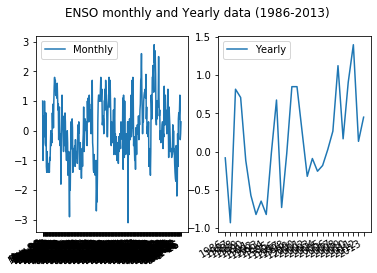

In [12]:
#This question is so broad what does it even want haha.
fig, (ax1, ax2) = pl.subplots(1,2)
ax1.plot_date(el_nino.Month_year, el_nino.Southern_oscillation_index, marker='', linestyle='-')
ax1.legend(['Monthly'])
ax2.plot_date(monthly.Month_year, monthly.Southern_oscillation_index, marker='', linestyle='-')
ax2.legend(['Yearly'])
fig.suptitle('ENSO monthly and Yearly data (1986-2013)')
fig.autofmt_xdate()
pl.show()


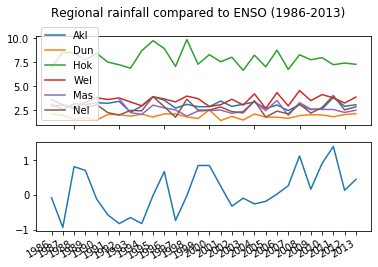

In [13]:

fig, (ax1, ax2) = pl.subplots(2)
x_dates = monthly['Month_year'].sort_values().unique()
#ax.xaxis.set_major_formatter(pl.FixedFormatter(x_dates))
ax1.plot_date(rainfallAuk.Date, rainfallAuk['Average Rainfall'], marker='', linestyle='-')
ax1.plot_date(rainfallDun.Date, rainfallDun['Average Rainfall'], marker='', linestyle='-')
ax1.plot_date(rainfallHok.Date, rainfallHok['Average Rainfall'], marker='', linestyle='-')
ax1.plot_date(rainfallWel.Date, rainfallWel['Average Rainfall'], marker='', linestyle='-')
ax1.plot_date(rainfallMas.Date, rainfallMas['Average Rainfall'], marker='', linestyle='-')
ax1.plot_date(rainfallNel.Date, rainfallNel['Average Rainfall'], marker='', linestyle='-')
ax1.legend(['Akl','Dun', 'Hok', 'Wel', 'Mas', 'Nel'])
ax2.plot_date(monthly.Month_year, monthly.Southern_oscillation_index, marker='', linestyle='-')

fig.suptitle('Regional rainfall compared to ENSO (1986-2013)')
fig.autofmt_xdate()
pl.show()


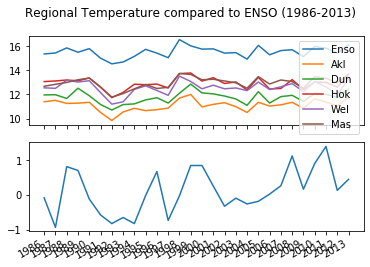

In [14]:
fig, (ax1, ax2) = pl.subplots(2)
x_dates = monthly['Month_year'].sort_values().unique()
#ax.xaxis.set_major_formatter(pl.FixedFormatter(x_dates))
ax1.plot_date(TempAuk['Year'], TempAuk['value'], marker='', linestyle='-')
ax1.plot_date(TempDun['Year'], TempDun['value'], marker='', linestyle='-')
ax1.plot_date(TempHok['Year'], TempHok['value'], marker='', linestyle='-')
ax1.plot_date(TempWel['Year'], TempWel['value'], marker='', linestyle='-')
ax1.plot_date(TempMas['Year'], TempMas['value'], marker='', linestyle='-')
ax1.plot_date(TempNel['Year'], TempNel['value'], marker='', linestyle='-')

ax1.legend(['Enso','Akl','Dun', 'Hok', 'Wel', 'Mas', 'Nel'])
ax2.plot_date(monthly.Month_year, monthly.Southern_oscillation_index, marker='', linestyle='-')
fig.suptitle('Regional Temperature compared to ENSO (1986-2013)')
fig.autofmt_xdate()
pl.show()

I have now tested if there is any correlation between the climate and El Nino

In [15]:

Temp_avg['Year']=pd.to_datetime(Temp['Year'], format='%Y')
Temp_avg=Temp_avg.groupby(
    [Temp_avg.Year.dt.strftime('%Y')]
)['value'].mean().reset_index(name='value_mean')


C:\Users\ravic\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
yearly_avg=pd.DataFrame({'Date':rain_avg['Date'],'ENSO':monthly['Southern_oscillation_index'],'Rainfall':rain_avg['Average Rainfall'], 'Temp':Temp_avg['value_mean']})
yearly_avg.corr(method='pearson')

,ENSO,Rainfall,Temp
ENSO,1.000000,0.167947,0.572692
Rainfall,0.167947,1.000000,0.056788
Temp,0.572692,0.056788,1.000000


I then test if this correlation is stronger or weaker in different parts of the country

In [17]:
yearly_auk=pd.DataFrame({'Date':TempAuk['Year'],'ENSO':monthly['Southern_oscillation_index'],'Rainfall_Auk':rainfallAuk['Average Rainfall'], 'Temp_Auk':TempAuk['value']})
yearly_Dun=pd.DataFrame({'Date':TempAuk['Year'],'ENSO':monthly['Southern_oscillation_index'],'Rainfall_Dun':rainfallDun['Average Rainfall'], 'Temp_Dun':TempDun['value']})
yearly_Wel=pd.DataFrame({'Date':TempAuk['Year'],'ENSO':monthly['Southern_oscillation_index'],'Rainfall_Wel':rainfallWel['Average Rainfall'], 'Temp_Well':TempWel['value']})
yearly_auk.corr(method='pearson')


,ENSO,Rainfall_Auk,Temp_Auk
ENSO,1.000000,0.238533,0.586845
Rainfall_Auk,0.238533,1.000000,0.107158
Temp_Auk,0.586845,0.107158,1.000000


In [18]:
yearly_Dun.corr(method='pearson')

,ENSO,Rainfall_Dun,Temp_Dun
ENSO,1.000000,-0.108965,0.481875
Rainfall_Dun,-0.108965,1.000000,-0.269426
Temp_Dun,0.481875,-0.269426,1.000000


In [19]:
yearly_Wel.corr(method='pearson')

,ENSO,Rainfall_Wel,Temp_Well
ENSO,1.000000,0.198821,0.448135
Rainfall_Wel,0.198821,1.000000,-0.067386
Temp_Well,0.448135,-0.067386,1.000000


There appears to be little difference between ENSO and the rainfall and Temperature within different parts of New Zealand. The main observable difference is the much lower rainfall in Dunedin then in Wellington or Aukland.


Below code sees if El Nino varies year to year within Auckland.

In [20]:
X = yearly_auk.drop("ENSO", axis=1)
y = yearly_auk['ENSO']
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)



In [21]:
tree = DecisionTreeRegressor()         
parameters_tree={'random_state':[0]}
grid_tree = GridSearchCV(estimator=tree, param_grid = parameters_tree, cv = 2, n_jobs=-1)
grid_tree.fit(X_train, y_train)
grid_tree.best_estimator_
grid_tree.score(X_test, y_test)


-0.4004422523726472

In [22]:
regressor = SVR()
parameters_SVR={'C':[1.0], 'cache_size':[200], 'coef0':[0.0], 'degree':[3], 'epsilon':[0.2], 'gamma':['scale'],
    'kernel':['rbf'], 'max_iter':[-1], 'shrinking':[True], 'tol':[0.001], 'verbose':[False]} 
grid_SVR = GridSearchCV(estimator=regressor, param_grid = parameters_SVR, cv = 2, n_jobs=-1)
grid_SVR.fit(X_train, y_train)
grid_SVR.best_estimator_ 
print('Score:', grid_SVR.score(X_test, y_test))


Score: -0.04535767076830366


In [23]:
model = LinearRegression()
parameters_model={'copy_X':[True], 'fit_intercept':[True], 'n_jobs':[None], 'normalize':[False]}
grid_model=GridSearchCV(estimator=model,param_grid=parameters_model, cv = 2, n_jobs=-1)
grid_model.fit(X_train, y_train)
grid_model.best_estimator_
print('R2:', grid_model.score(X_test, y_test))

# Use the forest's predict method on the test data
predictions = grid_model.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


R2: 0.2741118273069695
Mean Absolute Error: 0.53 degrees.


The LinearRegression gave us a R2 value of 0.274 with Mean absolute error of 0.43. This indicates that Rainfall and Temperature are good at explaining changes in ENZO. This makes sense as changes in ENSO during summer can bring increased westerly winds, more rain in the west, and drought in the east; in winter it can lead to more cool southerly winds. 


In [24]:
regr = RandomForestRegressor()
parameters_regr={}
grid_regr=GridSearchCV(estimator=regr,param_grid=parameters_regr, cv = 2, n_jobs=-1)
grid_regr.fit(X_train, y_train)
grid_regr.best_estimator_
print(grid_regr.score(X_test, y_test))


0.3599394974971122


In [ ]:
Predicting strength of El Nino in future years 

In [25]:
predENSO=pd.DataFrame({"tmin3":el_nino.Southern_oscillation_index, 'tmin2':el_nino.Southern_oscillation_index,'tmin1':el_nino.Southern_oscillation_index,"Southern_oscillation_index":el_nino.Southern_oscillation_index})
for i in range(1,len(predENSO.columns)):
        predENSO.iloc[:,i]=predENSO.iloc[:,i].shift(-i)
predENSO=predENSO.dropna(axis=0)
predENSO.head()


,tmin3,tmin2,tmin1,Southern_oscillation_index
0,1.0,-1.0,0.5,0.3
1,-1.0,0.5,0.3,-0.2
2,0.5,0.3,-0.2,1.0
3,0.3,-0.2,1.0,0.3
4,-0.2,1.0,0.3,-0.4


In [26]:
X_enso = predENSO.drop("Southern_oscillation_index", axis=1)
y_enso = predENSO['Southern_oscillation_index']
X_enso = preprocessing.normalize(X_enso)
X_train_enso, X_test_enso, y_train_enso, y_test_enso = train_test_split(
X_enso, y_enso, test_size=0.33, random_state=42)


In [27]:
RFG = RandomForestRegressor()
parameters_RFG={}
grid_RFG=GridSearchCV(estimator=RFG,param_grid=parameters_RFG, cv = 2, n_jobs=-1)
grid_RFG.fit(X_train_enso, y_train_enso)
grid_RFG.best_estimator_
RFG_score=grid_RFG.score(X_test_enso, y_test_enso)


In [28]:
LR = LinearRegression()
parameters_LR={'copy_X':[True], 'fit_intercept':[True], 'n_jobs':[None], 'normalize':[False]}
grid_LR=GridSearchCV(estimator=LR,param_grid=parameters_LR, cv = 2, n_jobs=-1)
grid_LR.fit(X_train_enso, y_train_enso)
grid_LR.best_estimator_
ENSO_score=grid_LR.score(X_test_enso, y_test_enso)
print(ENSO_score)


0.4648820064310908


In [29]:
predENSO6=pd.DataFrame({"tmin6":el_nino.Southern_oscillation_index, 'tmin5':el_nino.Southern_oscillation_index,'tmin4':el_nino.Southern_oscillation_index, "tmin3":el_nino.Southern_oscillation_index, 'tmin2':el_nino.Southern_oscillation_index,'tmin1':el_nino.Southern_oscillation_index,"Southern_oscillation_index":el_nino.Southern_oscillation_index})


In [30]:
for i in range(1, len(predENSO6.columns)):
    
        predENSO6.iloc[:,i]=predENSO6.iloc[:,i].shift(-i)
        
predENSO6=predENSO6.dropna(axis=0)

In [31]:
X_enso_6 = predENSO6.drop("Southern_oscillation_index", axis=1)
y_enso_6 = predENSO6['Southern_oscillation_index']
X_enso_6 = preprocessing.normalize(X_enso_6)
X_train_enso_6, X_test_enso_6, y_train_enso_6, y_test_enso_6 = train_test_split(
X_enso_6, y_enso_6, test_size=0.33, random_state=42)

In [32]:
RFG = RandomForestRegressor()
parameters_RFG={}
grid_RFG=GridSearchCV(estimator=RFG,param_grid=parameters_RFG, cv = 2, n_jobs=-1)
grid_RFG.fit(X_train_enso_6, y_train_enso_6)
grid_RFG.best_estimator_
RFG6_score=grid_RFG.score(X_test_enso_6, y_test_enso_6)
print(RFG6_score)

0.4318423468635929


In [33]:
LR = LinearRegression()
parameters_LR={'copy_X':[True], 'fit_intercept':[True], 'n_jobs':[None], 'normalize':[False]}
grid_LR=GridSearchCV(estimator=LR,param_grid=parameters_LR, cv = 2, n_jobs=-1)
grid_LR.fit(X_train_enso_6, y_train_enso_6)
grid_LR.best_estimator_
ENSO6_score=grid_LR.score(X_test_enso_6, y_test_enso_6)
print(ENSO6_score)

0.4342390615905911


In [34]:
predENSO12=pd.DataFrame({"tmin12":el_nino.Southern_oscillation_index, 'tmin11':el_nino.Southern_oscillation_index,'tmin10':el_nino.Southern_oscillation_index,"tmin9":el_nino.Southern_oscillation_index, 'tmin8':el_nino.Southern_oscillation_index,'tmin7':el_nino.Southern_oscillation_index, "tmin6":el_nino.Southern_oscillation_index, 'tmin5':el_nino.Southern_oscillation_index,'tmin4':el_nino.Southern_oscillation_index, "tmin3":el_nino.Southern_oscillation_index, 'tmin2':el_nino.Southern_oscillation_index,'tmin1':el_nino.Southern_oscillation_index,"Southern_oscillation_index":el_nino.Southern_oscillation_index})

for i in range(1,len(predENSO12.columns)):
        predENSO12.iloc[:,i]=predENSO12.iloc[:,i].shift(-i)

predENSO12=predENSO12.dropna(axis=0)

In [35]:
X_enso_12 = predENSO12.drop("Southern_oscillation_index", axis=1)
y_enso_12 = predENSO12['Southern_oscillation_index']
X_enso_12 = preprocessing.normalize(X_enso_12)
X_train_enso_12, X_test_enso_12, y_train_enso_12, y_test_enso_12 = train_test_split(
X_enso_12, y_enso_12, test_size=0.2, random_state=42)

In [36]:
RFG = RandomForestRegressor()
parameters_RFG={}
grid_RFG=GridSearchCV(estimator=RFG,param_grid=parameters_RFG, cv = 2, n_jobs=-1)
grid_RFG.fit(X_train_enso_12, y_train_enso_12)
grid_RFG.best_estimator_
RFG12_score=grid_RFG.score(X_test_enso_12, y_test_enso_12)
print(RFG12_score)


0.43754891968143983


In [37]:
LR = LinearRegression()
parameters_LR={'copy_X':[True], 'fit_intercept':[True], 'n_jobs':[None], 'normalize':[False]}
grid_LR=GridSearchCV(estimator=LR,param_grid=parameters_LR, cv = 2, n_jobs=-1)
grid_LR.fit(X_train_enso_12, y_train_enso_12)
grid_LR.best_estimator_
ENSO12_score=grid_LR.score(X_test_enso_12, y_test_enso_12)
print(ENSO12_score)

0.5469833768372891


In [38]:
print('Linear Regrssion R2 Score for 3 months:', ENSO_score)
print('Linear Regrssion R2 Score for 6 months:', ENSO6_score)
print('Linear Regrssion R2 Score for 12 months:', ENSO12_score)
print('Random Forest Regression R2 score for 3 months:',RFG_score)
print('Random Forest Regression R2 score for 6 months:', RFG6_score)
print('Random Forest Regression R2 score for 12 months:',RFG12_score)

Linear Regrssion R2 Score for 3 months: 0.4648820064310908
Linear Regrssion R2 Score for 6 months: 0.4342390615905911
Linear Regrssion R2 Score for 12 months: 0.5469833768372891
Random Forest Regression R2 score for 3 months: 0.27549848554579537
Random Forest Regression R2 score for 6 months: 0.4318423468635929
Random Forest Regression R2 score for 12 months: 0.43754891968143983


Other then for the linear regression for 6 months, throughout the models we can see that as the number of months increases so does the r2 score. This would be due to as the number of months increases the model has increased spread of data to train on. So 12months would allow the model to have a much better understand of the data compared to 3 months which doesn't encaptulate unforseen volatility.

I then test if Enso is getting stronger or weaker year affter year.

In [39]:
monthly1=monthly.astype(float)
result = scipy.stats.linregress(monthly1.Month_year, monthly1.Southern_oscillation_index)
rs=result.slope
print('ENSO slope:', rs)
print('The slope of the curve is 0.0329 meaning each year we see a increase of 0.0329 increase in ENZO. This indicates that ENSO is getting stronger over time.')

ENSO slope: 0.03298440065681445
The slope of the curve is 0.0329 meaning each year we see a increase of 0.0329 increase in ENZO. This indicates that ENSO is getting stronger over time.
